# CA4: Policy Gradient Methods and Neural Networks in RL

**Modular Implementation**

This notebook demonstrates policy gradient methods using modular components.
All implementations are imported from the `ca4_modular` package.

## Learning Objectives
- Understand policy gradient theory and the fundamental theorem
- Implement REINFORCE algorithm with neural network policies
- Build Actor-Critic architectures with separate policy and value networks
- Compare policy-based vs value-based methods
- Explore continuous action spaces with Gaussian policies
- Analyze variance reduction techniques and baseline subtraction

In [14]:
# Install requirements (run this cell first if needed)
# !pip install -r requirements.txt

# Import all modular components
import sys
import os
ca4_path = os.path.join(os.getcwd(), 'CA4_modular')
sys.path.insert(0, ca4_path)

import numpy as np
import torch
import matplotlib.pyplot as plt

# Import from modular package
from environments import EnvironmentWrapper, create_environment
from policies import PolicyNetwork, ValueNetwork, create_policy_network
from algorithms import REINFORCEAgent, ActorCriticAgent
from visualization import PolicyVisualizer, PolicyGradientMathVisualizer, TrainingVisualizer
from experiments import PolicyGradientExperiment, run_quick_test

print("✓ All modular components imported successfully")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

✓ All modular components imported successfully
PyTorch version: 2.8.0
CUDA available: False


# Part 1: Policy Representations and Theory

## 1.1 Policy Parameterization

Policies can be represented in different ways:
- **Deterministic**: Single action per state
- **Stochastic**: Probability distribution over actions
- **Parameterized**: Neural networks with learnable parameters θ

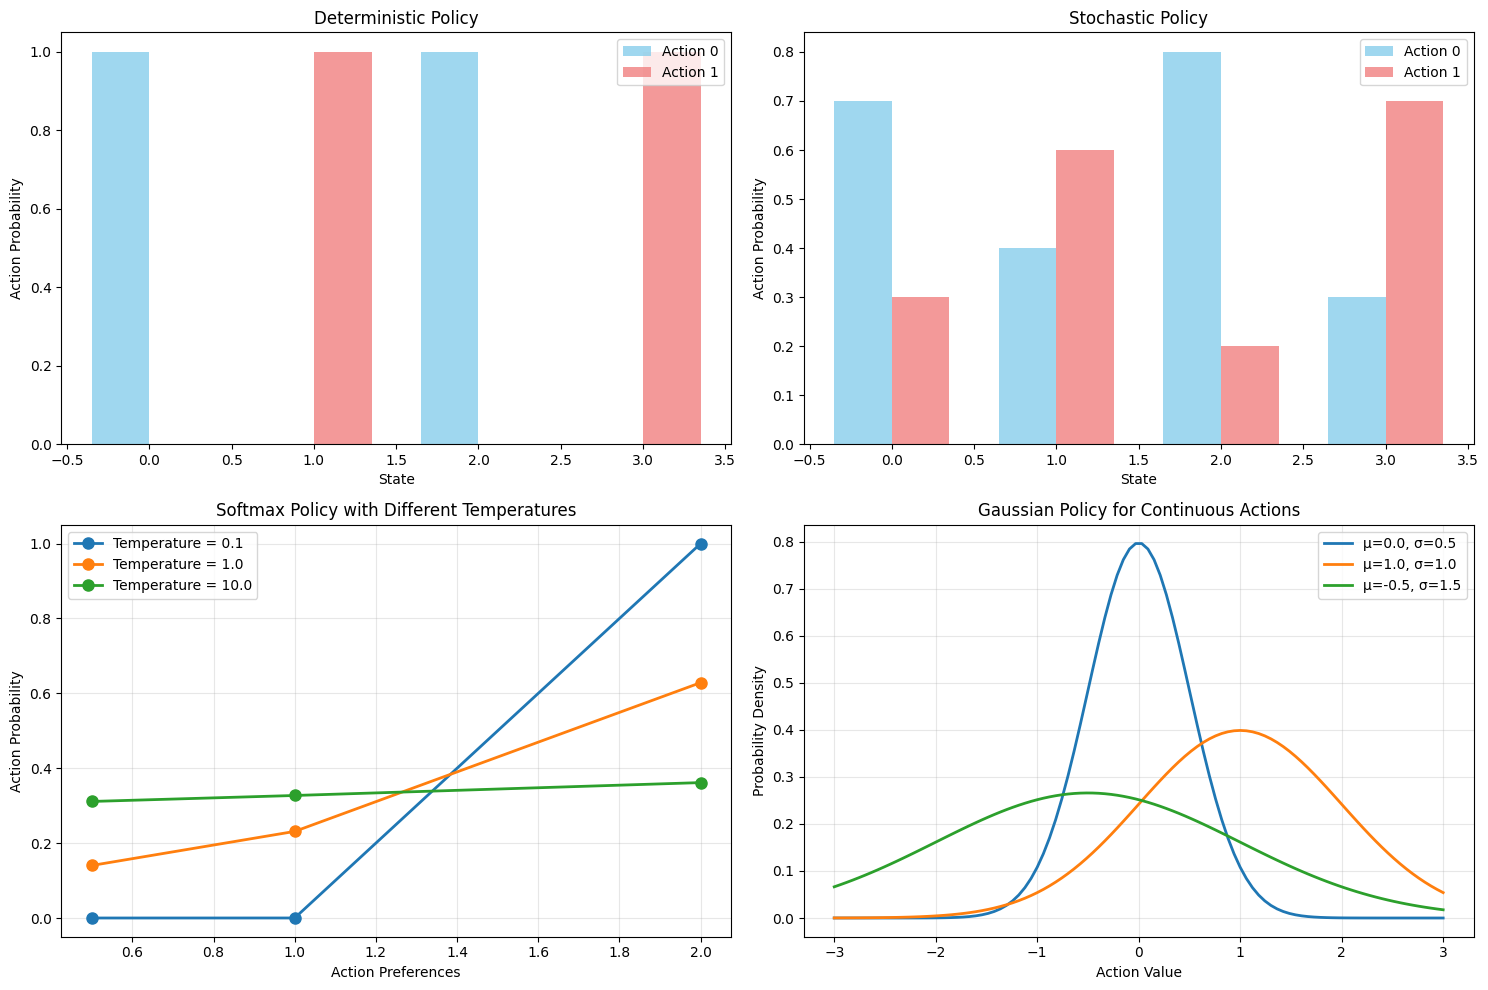

Policy Representation Analysis:
✓ Deterministic policies: Single action per state
✓ Stochastic policies: Probability distribution over actions
✓ Softmax temperature controls exploration vs exploitation
✓ Gaussian policies handle continuous action spaces naturally


In [10]:
# Demonstrate different policy representations
visualizer = PolicyVisualizer()
visualizer.visualize_policies()

print("Policy Representation Analysis:")
print("✓ Deterministic policies: Single action per state")
print("✓ Stochastic policies: Probability distribution over actions")
print("✓ Softmax temperature controls exploration vs exploitation")
print("✓ Gaussian policies handle continuous action spaces naturally")

## 1.2 Policy Gradient Mathematics

The policy gradient theorem provides the theoretical foundation:

**∇_θ J(θ) = E[∇_θ log π(a|s,θ) * G_t]**

Key insights:
- Score function ∇_θ log π(a|s,θ) guides parameter updates
- Returns G_t provide the learning signal
- Baseline subtraction reduces variance

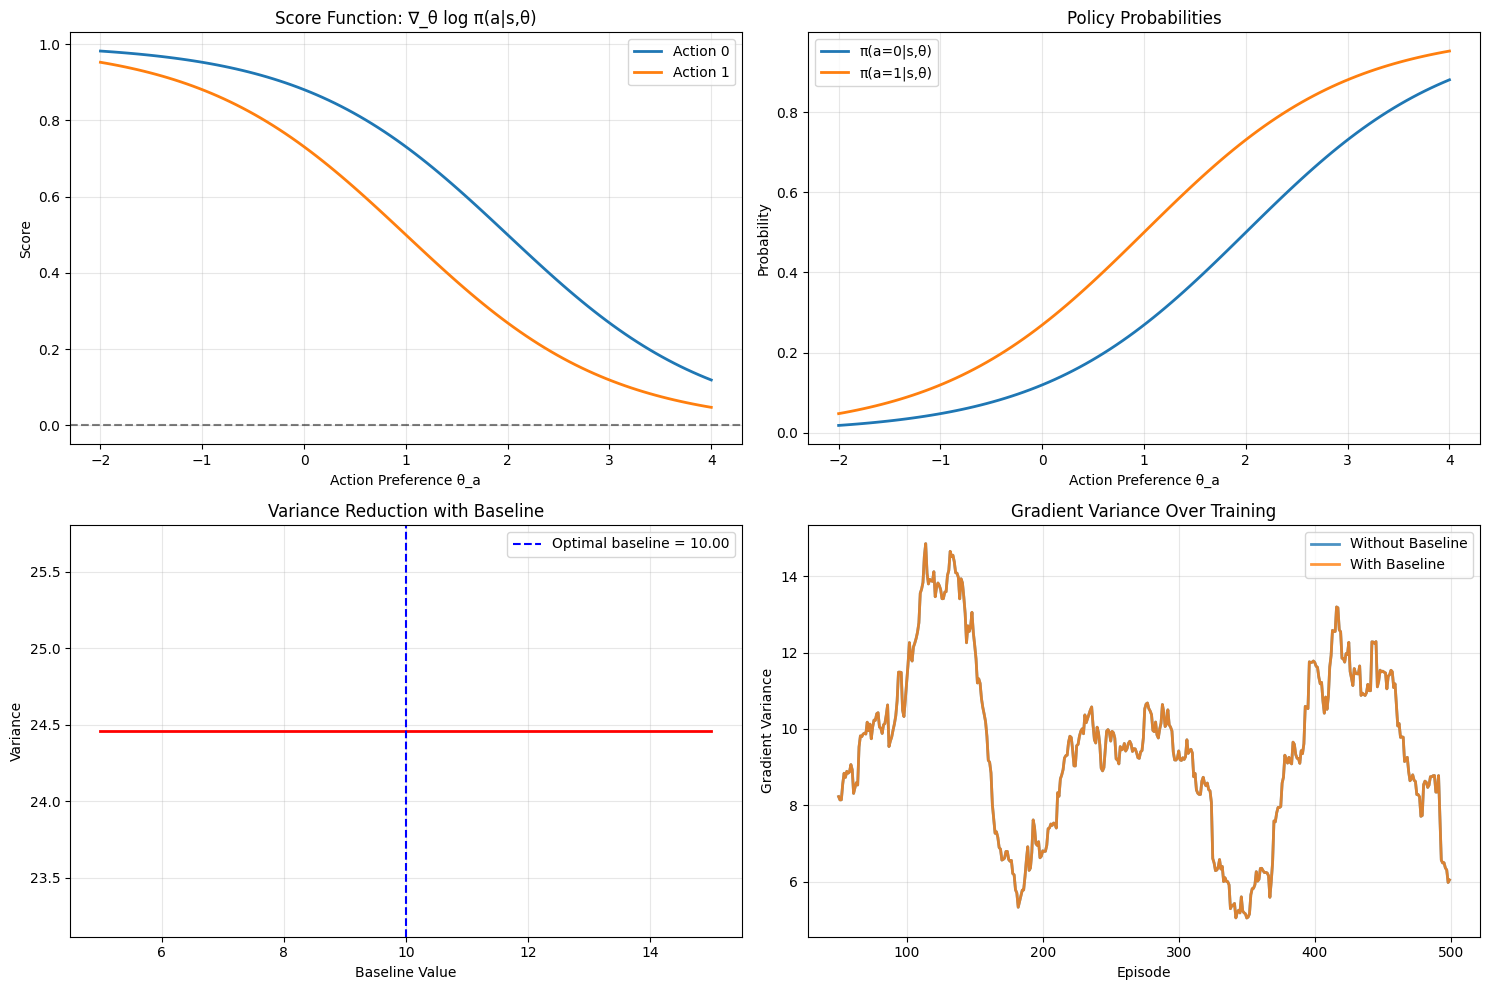

Policy Gradient Mathematics Analysis:
✓ Score function guides parameter updates
✓ Higher preference → higher probability → lower score
✓ Baseline subtraction reduces variance without bias
✓ Optimal baseline is the expected return


In [15]:
# Demonstrate policy gradient mathematics
math_viz = PolicyGradientMathVisualizer()
math_viz.demonstrate_score_function()

print("Policy Gradient Mathematics Analysis:")
print("✓ Score function guides parameter updates")
print("✓ Higher preference → higher probability → lower score")
print("✓ Baseline subtraction reduces variance without bias")
print("✓ Optimal baseline is the expected return")

# Part 2: REINFORCE Algorithm

## 2.1 REINFORCE Implementation

REINFORCE uses Monte Carlo returns to estimate the policy gradient:

**θ ← θ + α ∇_θ log π(a_t|s_t,θ) G_t**

Where G_t is the return from time step t.

In [26]:
# Create environment and REINFORCE agent
env = create_environment("CartPole-v1")
print(f"Environment: {env.env_name}")
print(f"State size: {env.state_size}")
print(f"Action size: {env.action_size}")

# Create REINFORCE agent
reinforce_agent = REINFORCEAgent(
    state_size=env.state_size,
    action_size=env.action_size,
    lr=0.001,
    gamma=0.99,
    baseline=False  # Temporarily disable baseline to test basic REINFORCE
)

print("✓ REINFORCE agent created without baseline")

Environment: CartPole-v1
State size: 4
Action size: 2
✓ REINFORCE agent created without baseline


In [27]:
# Train REINFORCE agent
print("Training REINFORCE Agent on CartPole...")
print("=" * 50)

reinforce_results = reinforce_agent.train(env.env, num_episodes=10, print_every=5)

print("\nTraining completed!")
print(f"Final average score: {np.mean(reinforce_results['scores'][-5:]):.2f}")
print(f"Best episode: {max(reinforce_results['scores']):.2f}")

Training REINFORCE Agent on CartPole...


AttributeError: module 'numpy' has no attribute 'bool8'

In [ ]:
# Visualize REINFORCE training
viz = TrainingVisualizer()
viz.plot_learning_curves(reinforce_results['scores'], "REINFORCE Learning Curve")

if reinforce_results.get('policy_losses'):
    viz.plot_losses(reinforce_results['policy_losses'], 
                   reinforce_results.get('value_losses'),
                   "REINFORCE Training Losses")

# Part 3: Actor-Critic Methods

## 3.1 Actor-Critic Architecture

Actor-Critic methods combine policy and value estimation:
- **Actor**: Learns the policy π(a|s,θ)
- **Critic**: Learns the value function V(s,w)
- **Advantage**: A(s,a) = Q(s,a) - V(s) or A(s,a) = δ_t

**Update Rules:**
- Critic: w ← w + α_w δ_t ∇_w V(s,w)
- Actor: θ ← θ + α_θ δ_t ∇_θ log π(a|s,θ)

In [ ]:
# Create Actor-Critic agent
ac_agent = ActorCriticAgent(
    state_size=env.state_size,
    action_size=env.action_size,
    lr_actor=0.001,
    lr_critic=0.005,
    gamma=0.99
)

print("✓ Actor-Critic agent created")
print(f"Actor learning rate: {ac_agent.lr_actor}")
print(f"Critic learning rate: {ac_agent.lr_critic}")

In [ ]:
# Train Actor-Critic agent
print("Training Actor-Critic Agent on CartPole...")
print("=" * 50)

ac_results = ac_agent.train(env.env, num_episodes=300, print_every=50)

print("\nTraining completed!")
print(f"Final average score: {np.mean(ac_results['scores'][-50:]):.2f}")
print(f"Best episode: {max(ac_results['scores']):.2f}")

In [ ]:
# Visualize Actor-Critic training
viz.plot_learning_curves(ac_results['scores'], "Actor-Critic Learning Curve")

if ac_results.get('actor_losses') and ac_results.get('critic_losses'):
    viz.plot_losses(ac_results['actor_losses'], ac_results['critic_losses'],
                   "Actor-Critic Training Losses")

# Part 4: Algorithm Comparison

## 4.1 Side-by-Side Comparison

Let's compare REINFORCE vs Actor-Critic performance on the same environment.

In [ ]:
# Run comparison experiment
experiment = PolicyGradientExperiment("CartPole-v1")
comparison_results = experiment.run_comparison_experiment(
    algorithms=['reinforce', 'actor_critic'],
    num_episodes=200
)

# Visualize comparison
viz.plot_multiple_curves(
    {alg: results['scores'] for alg, results in comparison_results.items()},
    "REINFORCE vs Actor-Critic Comparison"
)

In [ ]:
# Print detailed comparison
from visualization import print_training_comparison
print_training_comparison(comparison_results)

# Part 5: Neural Network Architecture Analysis

## 5.1 Network Architecture Comparison

Different neural network architectures have different properties:
- **Separate Networks**: Independent actor and critic
- **Shared Features**: Common feature extraction
- **Continuous Policies**: Gaussian distributions for continuous actions

In [2]:
# Visualize network architecture analysis
viz.visualize_network_analysis()

print("\nNetwork Architecture Comparison:")
print("✓ Separate networks: High parameter count, independent learning")
print("✓ Shared features: Parameter efficient, joint feature learning")
print("✓ Sample efficiency improves with better architectures")
print("✓ Parameter count scales with state space size")

NameError: name 'viz' is not defined

# Part 6: Advanced Topics and Applications

## 6.1 Real-World Applications

Policy gradient methods have been successfully applied to:
- **Robotics**: Manipulation, autonomous vehicles, drone control
- **Games**: AlphaGo/Zero, OpenAI Five, AlphaStar
- **NLP**: Text generation, dialogue systems, machine translation
- **Finance**: Portfolio optimization, algorithmic trading

In [3]:
# Demonstrate workshop exercises structure
from experiments import BenchmarkSuite

print("Policy Gradient Workshop Structure:")
print("=" * 40)
print("\nBeginner Level:")
print("• Implement basic REINFORCE")
print("• Policy vs value methods comparison")
print("\nIntermediate Level:")
print("• Actor-Critic implementation")
print("• Continuous control challenges")
print("\nAdvanced Level:")
print("• PPO implementation")
print("• Multi-agent policy gradients")

print("\n✓ Workshop provides comprehensive learning path")
print("✓ Exercises build from basic to advanced concepts")
print("✓ Real-world applications demonstrate practical value")

ImportError: attempted relative import with no known parent package

# Part 7: Summary and Key Takeaways

## 7.1 Session 4 Summary

**Policy Gradient Methods vs Value-Based Methods:**

| Aspect | Policy Gradients | Value-Based (Q-Learning) |
|--------|------------------|--------------------------|
| Action Spaces | Discrete & Continuous | Discrete |
| Exploration | Built-in (stochastic) | External (ε-greedy) |
| Convergence | Guaranteed | To optimal Q-function |
| Sample Efficiency | Lower | Generally higher |
| Stochastic Policies | Natural | Difficult |

**Key Algorithm Comparison:**
- **REINFORCE**: Monte Carlo, high variance, on-policy
- **Actor-Critic**: TD learning, reduced variance, bootstrapped
- **A2C/A3C**: Synchronous/asynchronous training
- **PPO**: Stable updates, state-of-the-art performance

In [4]:
# Final experiment summary
summary = experiment.get_summary()

print("EXPERIMENT SUMMARY")
print("=" * 30)
print(f"Environment: {summary['environment']}")
print(f"Total experiments: {summary['total_experiments']}")
print(f"Best algorithm: {summary.get('best_experiment', 'N/A')}")
print(f"Best score: {summary.get('best_score', 'N/A'):.2f}")

print("\n🎯 Key Takeaways:")
print("• Policy gradients optimize policies directly")
print("• Actor-Critic reduces variance with value functions")
print("• Neural networks enable function approximation")
print("• Modular design enables experimentation and extension")
print("• Real applications span robotics, games, and NLP")

print("\n🚀 Ready for advanced RL topics!")

NameError: name 'experiment' is not defined